In [1]:
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf

tf.__version__

'1.14.0'

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
import matplotlib.pyplot as plt

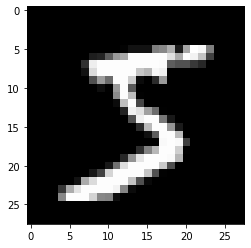

In [5]:
plt.imshow(X_train[0], cmap = 'gray')

In [6]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [7]:
#NORMALIZATION

In [8]:
X_train = tf.keras.utils.normalize(X_train, axis = 1)
X_test = tf.keras.utils.normalize(X_test, axis = 1)

In [9]:
print(X_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

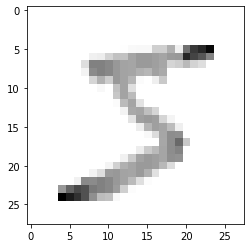

In [10]:
plt.imshow(X_train[0], cmap = 'binary')

In [11]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape = (28, 28)))

In [12]:
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [13]:
model.fit(X_train, y_train, epochs = 4)

Epoch 1/4
60000/60000 [==============================] - 4s 60us/sample - loss: 0.2648 - acc: 0.9229
Epoch 2/4
60000/60000 [==============================] - 3s 47us/sample - loss: 0.1078 - acc: 0.9672
Epoch 3/4
60000/60000 [==============================] - 3s 52us/sample - loss: 0.0720 - acc: 0.9776
Epoch 4/4
60000/60000 [==============================] - 4s 67us/sample - loss: 0.0539 - acc: 0.9834


In [14]:
val_loss, val_acc = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 28us/sample - loss: 0.0939 - acc: 0.9720


In [15]:
model.save('epic_num_reader.model')

In [16]:
ls

 0.png   4.xcf        DIG_RECOGN.ipynb            'State Bank of India2340.pdf'
 1       56.png       epic_num_reader.model        Untitled1.ipynb
 1.png   5.png        final.png                    Untitled.ipynb
 2       7.png        Machine_Learning_Sections/
 3       aomine.png   PetImages/
 4.png   AOMINE.png   resume.pdf


In [17]:
new_model = tf.keras.models.load_model('/home/abhishek/Desktop/epic_num_reader.model')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [18]:
import numpy as np
prediction = new_model.predict(np.array((X_test)))

In [19]:
print(prediction)

[[3.9314688e-10 4.1082578e-07 1.7636637e-05 ... 9.9998057e-01
  9.4954238e-08 8.8948276e-08]
 [1.7290859e-09 1.7519096e-06 9.9999762e-01 ... 2.2436120e-09
  1.5648112e-07 5.0109684e-11]
 [6.3863119e-08 9.9992442e-01 4.4193876e-05 ... 2.0263342e-05
  6.2637514e-06 9.3481901e-07]
 ...
 [1.5810791e-08 1.1044272e-06 7.9829255e-07 ... 5.2410356e-05
  2.3133234e-05 6.9991089e-05]
 [9.6371596e-06 2.2862441e-08 8.0614981e-08 ... 1.0554597e-06
  4.0282534e-06 1.0738812e-09]
 [1.5973993e-07 8.0019467e-09 3.0029760e-08 ... 1.4244932e-10
  5.0629811e-09 8.8690788e-09]]


In [20]:
print(np.argmax(prediction[0]))

7


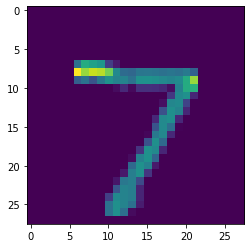

In [21]:
plt.imshow(X_test[0])

In [125]:
import cv2
img = cv2.imread('/home/abhishek/Desktop/23.png', cv2.IMREAD_GRAYSCALE)
img = 255-img

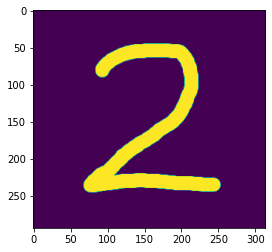

In [126]:
plt.imshow(img)

In [127]:
print(img.shape)

(294, 314)


In [128]:
img = cv2.resize(img, (28, 28))

In [129]:
to_predict = []
to_predict.append(img)
#to_predict = tf.keras.utils.normalize(to_predict, axis = 1)

In [130]:
print(to_predict[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  43 191 191 191 191 191 189
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 191 191 191 191 191 191 191 191 191
  191   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 191 191 191  29   0   0   0   0   0 133
  191   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  99 191 135   0   0   0   0   0   0   0   0
  191 191   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 191   0   0   0   0   0   0   

In [131]:
type(img)

numpy.ndarray

In [132]:
predictions = model.predict(np.array(to_predict))

2
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


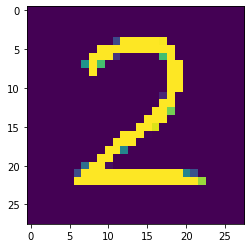

In [133]:
print(np.argmax(predictions[0]))
print(predictions[0])
plt.imshow(to_predict[0])

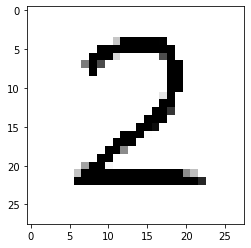

In [134]:
plt.imshow(to_predict[0], cmap = 'binary')

9


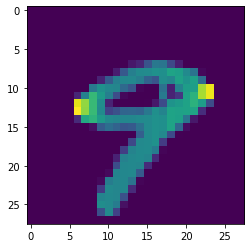

In [135]:
print(np.argmax(prediction[9]))
plt.imshow(X_test[9])